In [4]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

In [5]:
path_img_input="./snap2.png"
path_img_output="/test_output.jpg"
path_config="gpu.config copy.yml"


cfg = OmegaConf.load(path_config)

In [6]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)

# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2023-12-18 17:20:09,212", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2023-12-18 17:20:09,213", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2023-12-18 17:20:09,347", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2023-12-18 17:20:09,567", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2023-12-18 17:20:09,573", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2023-12-18 17:20:09,573", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2023-12-18 17:20:09,849", "levelname": "INFO", "message": "Initializing FacePredictor align"}
{"asctime": "2023-12-18 17:20:09,926", "levelname": "INFO", "message": "Initializing BaseUtilizer objects"}
{"asctime": "2023-12-18 17:20:09,927", "levelname": "INFO", "message": "Initializing BaseUtilizer align"}
{"asctime": "2023-12-18 17:20:09,964", "levelname": "INFO", "message"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


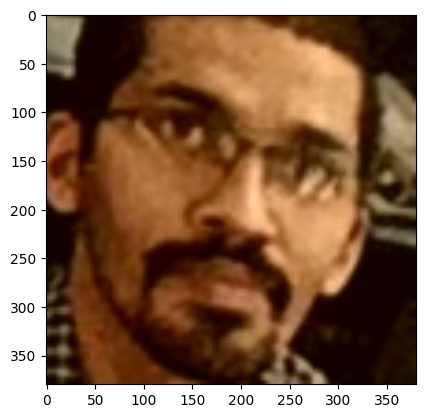

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(response.faces[0].tensor.cpu().permute(1,2,0))

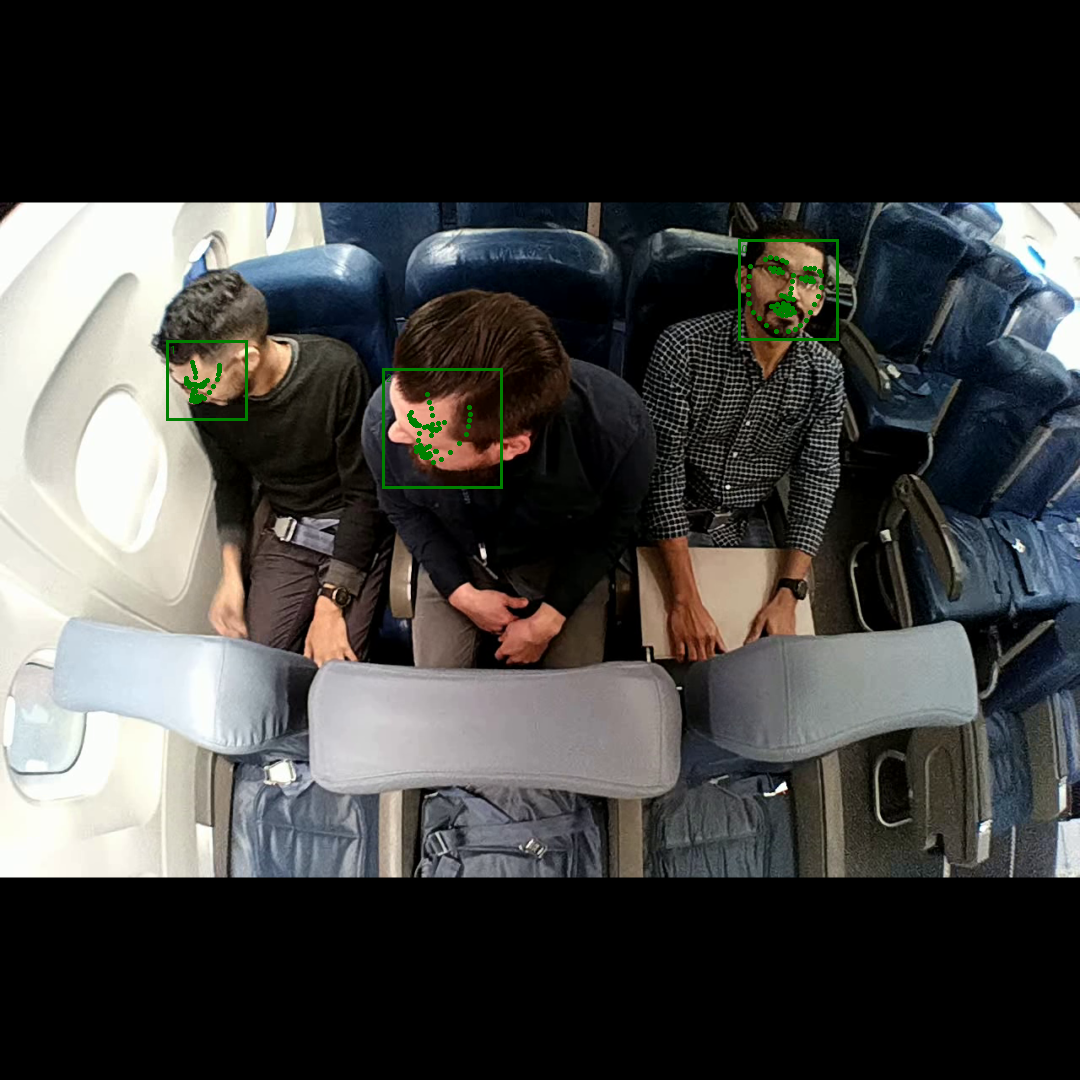

In [52]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image